In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import fm2p

Loading DLC 2.3.7...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


c:\Users\dmartins\anaconda3\envs\fm1\lib\site-packages\oasis\functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [2]:
base_path = r'T:\axonal_imaging_LP\250424_DMM_DMM046_LPaxons\TSeries-04242025-1245-004\suite2p\plane0'

In [4]:
twop_recording = fm2p.TwoP()
twop_recording.add_files(base_path=base_path)
twop_dict = twop_recording.calc_dFF(oasis=False)

In [6]:
twop_dict.keys()

dict_keys(['raw_F0', 'norm_F0', 'raw_F', 'norm_F', 'raw_Fneu', 'raw_dFF', 'norm_dFF', 'oasis_spks', 's2p_spks'])

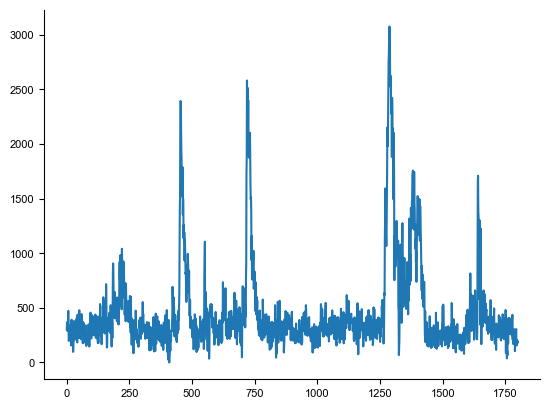

In [8]:
plt.plot(twop_dict['raw_dFF'][0,:])

In [13]:
from scipy.stats import pearsonr
from tqdm import tqdm

In [11]:
norm_dFF = twop_dict['norm_dFF']
norm_dFF.shape

(2048, 1800)

In [14]:
ncells = np.size(norm_dFF, 0)
allp = np.zeros([ncells, ncells]) * np.nan
allcc = np.zeros([ncells, ncells]) * np.nan
# get pairwise correlation of all of the units
for cell in tqdm(range(ncells)):
    for pair in range(ncells):
        # don't calculate correlation with yourself
        if pair==cell:
            continue
        pearson_result = pearsonr(norm_dFF[cell,:], norm_dFF[pair,:])
        allp[cell, pair] = pearson_result.statistic
        allcc[cell, pair] = pearson_result.pvalue

100%|██████████| 2048/2048 [42:01<00:00,  1.23s/it]
